In [1]:
# Import pandas as pd to read the dataset.
import pandas as pd
# Import train_test_split from sklearn.model_selection to split train data and test data.
from sklearn.model_selection import train_test_split
# Import DecisionTreeClassifier from sklearn.tree to make a model which can make decisions using a tree,
# plot_tree from sklearn.tree to visualize the tree generated by the model, and
# export_graphviz from sklearn.tree to export the generated tree.
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
# Import accuracy_score from sklearn.metrics to see how well the model can predict.
from sklearn.metrics import accuracy_score
# Import StringIO from six to create a dot file in which the tree will be exported.
from six import StringIO
# Import graph_from_dot_data from pydotplus to get the tree from the dot file.
from pydotplus import graph_from_dot_data
# Import Image from IPython.display to create a png file which contains the tree.
from IPython.display import Image
# Import dump and load from joblib to export and use the trained model.
from joblib import dump, load

In [2]:
# Read the dataset given.
data = pd.read_csv("buy_property.csv")
# Display the contents of the dataset.
data.head()

,money_left,property_cost,opponent_average,go_distance,opponent_house_distance,buy_property
0,200,200,800,17,32,0
1,1200,60,1400,18,10,1
2,1800,160,1800,12,24,1
3,400,200,1200,18,6,0
4,1000,240,400,14,17,1


In [3]:
# List the features of the dataset.
features = ["money_left", "property_cost", "opponent_average", "go_distance", "opponent_house_distance"]
# Split the dataset into feature_data which will be the condition of the class feature
feature_data = data[features]
# Display the contents of feature data.
feature_data.head()

,money_left,property_cost,opponent_average,go_distance,opponent_house_distance
0,200,200,800,17,32
1,1200,60,1400,18,10
2,1800,160,1800,12,24
3,400,200,1200,18,6
4,1000,240,400,14,17


In [4]:
# Split the dataset into class_feature_data whose value will be based on the features.
class_feature_data = data.buy_property
# Display the contents of class feature data.
class_feature_data.head()

0    0
1    1
2    1
3    0
4    1
Name: buy_property, dtype: int64

In [5]:
# Split the datasets into 80% train data and 20% test data.
feature_train_data, feature_test_data, class_feature_train_data, class_feature_test_data = train_test_split(feature_data, class_feature_data, test_size = 0.2, random_state = 1)
# Display the contents of feature train data.
feature_train_data.head()

,money_left,property_cost,opponent_average,go_distance,opponent_house_distance
110,1600,120,1400,2,9
122,1000,300,1600,2,9
58,200,60,1000,14,2
14,600,100,800,30,20
56,1200,60,1200,4,8


In [6]:
# Display the contents of feature test data.
feature_test_data.head()

,money_left,property_cost,opponent_average,go_distance,opponent_house_distance
97,1800,400,600,5,8
117,1400,240,1000,13,36
59,800,200,800,24,36
35,1400,300,400,26,34
165,400,180,1600,24,1


In [7]:
# Display the contents of class feature train data.
class_feature_train_data.head()

110    1
122    1
58     0
14     1
56     1
Name: buy_property, dtype: int64

In [8]:
# Display the contents of class feature test data.
class_feature_test_data.head()

97     1
117    1
59     1
35     1
165    0
Name: buy_property, dtype: int64

Accuracy score:  0.9024390243902439


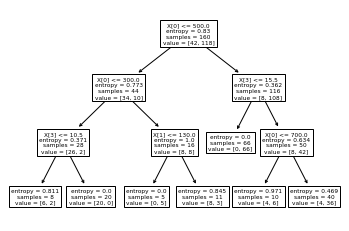

In [9]:
# Create a decision tree classifier model.
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
# Train the model with the train data.
model = model.fit(feature_train_data, class_feature_train_data)
# Visualize the tree after it has been generated by the model.
plot_tree(model)
# Make the model predict the class feature values based on the feature test data.
class_feature_predictions = model.predict(feature_test_data)
# Display the accuracy score to see how well the model can predict.
print("Accuracy score: ", accuracy_score(class_feature_test_data, class_feature_predictions))

In [ ]:
# Create a dot file in which the tree will be exported.
dot_data = StringIO()
# Export the tree to the dot file.
export_graphviz(model, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = features, class_names = ['0', '1'])
# Get the tree from the dot file.
graph = graph_from_dot_data(dot_data.getvalue())
# Insert the tree to a png file.
graph.write_png("buy_property.png")
# Create a png file which contains the tree.
Image(graph.create_png())

In [ ]:
# Export the trained model to a joblib file.
dump(model, "model.joblib")
# Use the existing trained model from a joblib file.
model = load("model.joblib")